### Joshua Campos - Nr. 304738

## Lab Course Machine Learning
# Exercise 3

## 1.1 Data Pre-Processing

- Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,spearmanr

- Create a function that takes the '**x data**' and the '**y data**' and splits it according to the specified training percentage to return an '**x training set**', '**y training set**', '**x testing set**' and '**y testing set**'.

In [2]:
def split_train_test(x_data,y_data,train_percentage):
    row_selection = np.random.rand(len(x_data)) < train_percentage
    x_train = x_data[row_selection]
    y_train = y_data[row_selection]
    x_test = x_data[~row_selection]
    y_test = y_data[~row_selection]
    return (x_train,y_train,x_test,y_test)

- Create two functions to check the influence that a certain independent variable has on the dependent variable. The first function checks the correlation between each individual variable and the dependent variable; if the correlation coefficient is higher than the specified minimum ratio, it is included into the significant columns' array. The second function checks the significance level between each individual variable and the dependent variable; if the p-value is lower than the specified significance level, it is is included into the significant columns' array.

In [3]:
def check_correlation_coefficients(x_data, y_data, minimum_ratio):
    significant_columns = []
    for column in x_data:
        coeff, pvalue = pearsonr(x_data[column],y_data)
        if coeff > minimum_ratio:
            significant_columns.append(column)
    return significant_columns

def check_significance_levels(x_data, y_data, significance_level):
    significant_columns = []
    for column in x_data:
        coeff, pvalue = pearsonr(x_data[column],y_data)
        if pvalue < significance_level:
            significant_columns.append(column)
    return significant_columns

#### 1. Airfare and Demand

- We import the data file using Pandas, and we define the column names during the file reading. 
- Then we print the dataframe info using the .info() function.

In [4]:
airfare_data = pd.read_csv('airq402.data', delim_whitespace=True, 
                           names=['city_from','city_to','avg_fare','distance','avg_week_passengers',\
                                  'market_leading_airline','market_share_leading','avg_fare_leading',\
                                  'lowest_price_airline','market_share_lowest','price'])

print(airfare_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
city_from                 1000 non-null object
city_to                   1000 non-null object
avg_fare                  1000 non-null float64
distance                  1000 non-null int64
avg_week_passengers       1000 non-null float64
market_leading_airline    1000 non-null object
market_share_leading      1000 non-null float64
avg_fare_leading          1000 non-null float64
lowest_price_airline      1000 non-null object
market_share_lowest       1000 non-null float64
price                     1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB
None


- From the .info() method used above, we can see that there are four non-numerical columns. In order to use these columns as independent variables for our model, we should make them 'dummy variables', which means that there will be one column for every unique value in each column, and there will be a 1 or a 0 if to define if the variable is present or not in each specific row. We do that by using the Pandas' built-in function .get_dummies().
- Then we can separate our data into our independent variables (x data) and our dependent variable (y data).
- To reduce our amount of variables for our model, we check the significance level using the 'pearsonr' function to get the 
p-value of each independent variable. We chose to use all the variables that have a p-value lower than 0.05. 
- After this, we split our 'x' and 'y' data into training and testing set using 80% of our data for training.

In [5]:
airfare_data_with_dummies = pd.get_dummies(airfare_data, drop_first=True)

x_data_airfare = airfare_data_with_dummies.iloc[:, airfare_data_with_dummies.columns != 'price']
y_data_airfare = airfare_data_with_dummies['price']

significant_columns_airfare = check_significance_levels(x_data_airfare, y_data_airfare, 0.05)
x_data_airfare = x_data_airfare[significant_columns_airfare]
print('Significant Columns:\n{}'.format(significant_columns_airfare))

train_percentage = 0.8
x_train_airfare,y_train_airfare,x_test_airfare,y_test_airfare = \
    split_train_test(x_data_airfare, y_data_airfare, train_percentage)

Significant Columns:
['avg_fare', 'distance', 'avg_week_passengers', 'market_share_leading', 'avg_fare_leading', 'market_share_lowest', 'city_from_BOI', 'city_from_BOS', 'city_from_BUR', 'city_from_BWI', 'city_from_CLT', 'city_from_DFW', 'city_from_LAS', 'city_from_LGA', 'city_from_MSP', 'city_from_OAK', 'city_from_ONT', 'city_from_PDX', 'city_from_PHL', 'city_from_RNO', 'city_to_BNA', 'city_to_GEG', 'city_to_IAD', 'city_to_LBB', 'city_to_LGA', 'city_to_MCO', 'city_to_PHL', 'city_to_PIT', 'city_to_RNO', 'city_to_SFO', 'city_to_TPA', 'market_leading_airline_AS', 'market_leading_airline_B6', 'market_leading_airline_CO', 'market_leading_airline_FL', 'market_leading_airline_NW', 'market_leading_airline_TZ', 'market_leading_airline_UA', 'market_leading_airline_US', 'market_leading_airline_WN', 'lowest_price_airline_AQ', 'lowest_price_airline_B6', 'lowest_price_airline_CO', 'lowest_price_airline_DL', 'lowest_price_airline_FL', 'lowest_price_airline_HP', 'lowest_price_airline_UA', 'lowest_pri

#### 2. Wine Quality

- We import the data file using Pandas' built-in function.
- Then we print the dataframe info using the .info() function to understand the characteristics of the data.

In [6]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


- In the case for this dataset, we can see that there are no non-numerical variables, so creating 'dummy variables' is not necessary. 
- We still define our 'x data' and 'y data' for our independent variables and dependent variable respectively.
- Then we check if our independent variables are significant by using the 'pearsonr' function and including all the variables that have a significance level below 0.05. 
- After that, we can split our data into the training and testing sets for both 'x' and 'y' data.

In [7]:
x_data_wine = wine_data.iloc[:, wine_data.columns != 'quality']
y_data_wine = wine_data['quality']

significant_columns_wine = check_significance_levels(x_data_wine, y_data_wine, 0.05)
x_data_wine = x_data_wine[significant_columns_wine]
print('Significant Columns:\n{}'.format(significant_columns_wine))

train_percentage = 0.8
x_train_wine,y_train_wine,x_test_wine,y_test_wine = split_train_test(x_data_wine, y_data_wine, train_percentage)

Significant Columns:
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


#### 3. Parkinson's Dataset

- We import the data file using Pandas' built-in function.
- Then we print the dataframe info using the .info() function to understand the characteristics of the data.

In [8]:
parkinson_data = pd.read_csv('parkinsons_updrs.data')

print(parkinson_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

- Similarly to the previous dataset, we can see that there are no non-numerical variables, so creating 'dummy variables' is not necessary. 
- We still define our 'x data' and 'y data' for our independent variables and dependent variable respectively.
- Then we check if our independent variables are significant by using the 'pearsonr' function and including all the variables that have a significance level below 0.05, for which in this specific case is all of the variables.
- After that, we can split our data into the training and testing sets for both 'x' and 'y' data.

In [9]:
x_data_parkinson = parkinson_data.iloc[:, parkinson_data.columns != 'total_UPDRS']
y_data_parkinson = parkinson_data['total_UPDRS']

significant_columns_parkinson = check_significance_levels(x_data_parkinson, y_data_parkinson, 0.05)
x_data_parkinson = x_data_parkinson[significant_columns_parkinson]
print('Significant Columns:\n{}'.format(significant_columns_parkinson))

train_percentage = 0.8
x_train_parksinson,y_train_parksinson,x_test_parksinson,y_test_parksinson = \
    split_train_test(x_data_parkinson, y_data_parkinson, train_percentage)

Significant Columns:
['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


---------------

**Comment:** There are two types of columns that can be dropped in the cases we covered before: 
- The first one is when we create dummy variables for our non-numerical columns, we should always drop one of the columns created. For example, if a column 'city' includes 15 unique cities and we create dummy variables for each city, we should only create 14 new columns, in order to prevent multicollinearity within our model.
- Another type of column that can be dropped, are those that are not significant to our dependent variable. This significance level can be calculated in different ways, but the goal is to include the independent variables that have the most incluence on our dependent variable, otherwise our model can be influenced by not important variables and make our prediction worse.

## 1.2 Linear Regression with Gradient Descent

### Part A (8 Points): Implement Linear Regression with Gradient Descent

- We create two general functions. The first one normalizes dataframe values into a range from zero to 10, and the second one calculates the RMSE (Root Mean Squared Error), given the real values and the predictions.

In [10]:
def normalize_dataframe(dataframe):
    new_dataframe = ((dataframe - dataframe.min())/(dataframe.max() - dataframe.min()))*10
    return new_dataframe

def calculate_rmse(y,y_predicted):
    return np.sqrt((np.sum(y-y_predicted)**2)/len(y))

- We also define three more functions. The first one performs the gradient descent and calculates the coefficients for each variable; the second one fits the model using the minimize_gd() function mentioned before; and the last one predicts the 'y'.

In [11]:
def minimize_gd(function,function_derivative,x,y,beta,step_size,max_iterations):
    old_beta = beta
    differences = []
    errors = []
    for i in range(max_iterations):
        gradient = function_derivative(x,y,old_beta)
        new_beta = old_beta-step_size*gradient
        difference = abs(np.sum(function(x,y,old_beta) - function(x,y,new_beta)))
        differences.append(difference)
        y_predicted = predict_linreg(x,new_beta)
        error = calculate_rmse(y,y_predicted)
        errors.append(error)
        old_beta=new_beta
    return new_beta,differences,errors

def learn_linreg_gd(function,function_derivative,x_data,y_data,step_size,max_iterations):
    X = x_data
    y = y_data
    b0 = np.full((X.shape[1],1),0)
    coefficients,differences,errors = minimize_gd(function,function_derivative,x_data,y_data,b0,step_size,max_iterations)
    return (coefficients,differences,errors)

def predict_linreg(x,beta):
    return np.dot(x,beta)

- Here we define the objective function and its derivative. 

In [12]:
lf = lambda x,y,beta: y-np.dot(x,beta)**2
lf_derivative = lambda x,y,beta: -2*np.dot(x.T,y-np.dot(x,beta))

#### 1. Airfare & Demand

- We define our 'x' and 'y' data set by normalizing both of them.

In [13]:
X = normalize_dataframe(x_train_airfare)

y_reshape = np.array(y_train_airfare).reshape(len(y_train_airfare),1)
y = normalize_dataframe(y_reshape)

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 1000 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-8. 

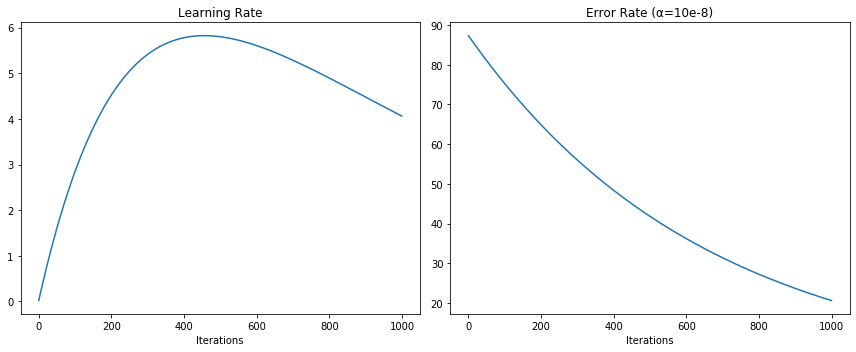

In [14]:
step_size = 10**-8
iterations = 1000

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate (α=10e-8)')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 1000 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-7. 

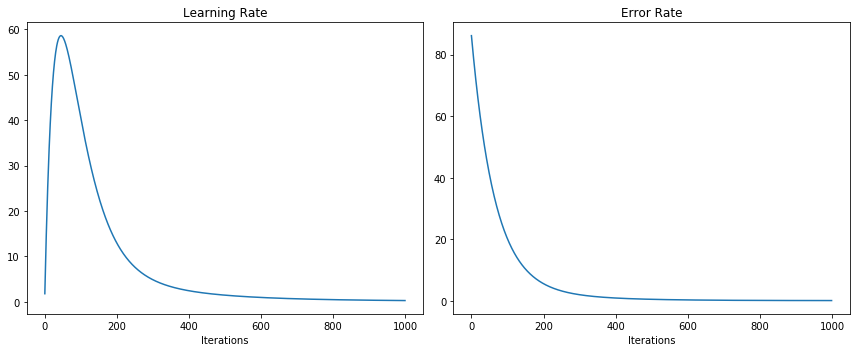

In [15]:
step_size = 10**-7
iterations = 1000

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly.

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 100 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-6. 

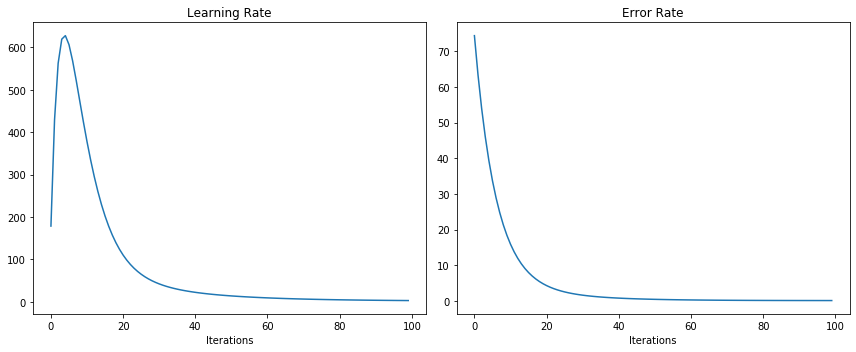

In [16]:
step_size = 10**-6
iterations = 100

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly. In this case we required 100 iterations to find the optimal fit. 

#### 2. Wine Quality

- We define our 'x' and 'y' data set by normalizing both of them.

In [17]:
X = normalize_dataframe(x_train_wine)

y_reshape = np.array(y_train_wine).reshape(len(y_train_wine),1)
y = normalize_dataframe(y_reshape)

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 1000 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-8. 

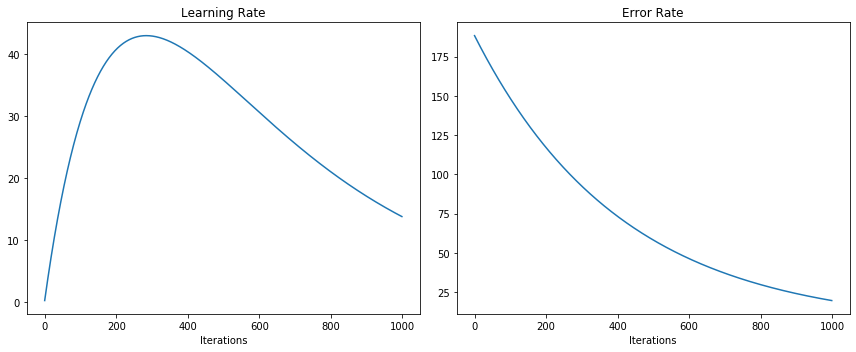

In [18]:
step_size = 10**-8
iterations = 1000

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 300 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-7. 

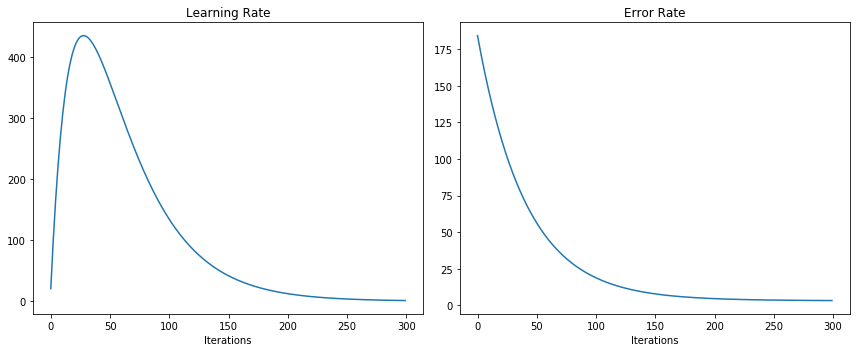

In [19]:
step_size = 10**-7
iterations = 300

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly.

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 100 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-6. 

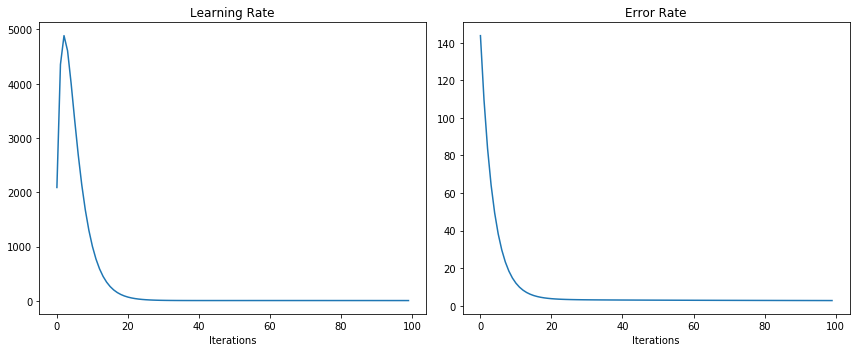

In [20]:
step_size = 10**-6
iterations = 100

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly. In this case we required 100 iterations to find the optimal fit.

#### 3. Parkinson's Dataset

- We define our 'x' and 'y' data set by normalizing both of them.

In [21]:
X = normalize_dataframe(x_train_parksinson)

y_reshape = np.array(y_train_parksinson).reshape(len(y_train_parksinson),1)
y = normalize_dataframe(y_reshape)

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 1000 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-9. 

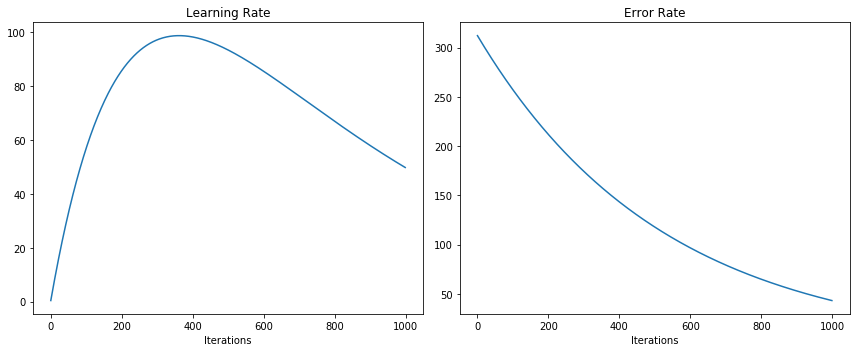

In [22]:
step_size = 10**-9
iterations = 1000

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

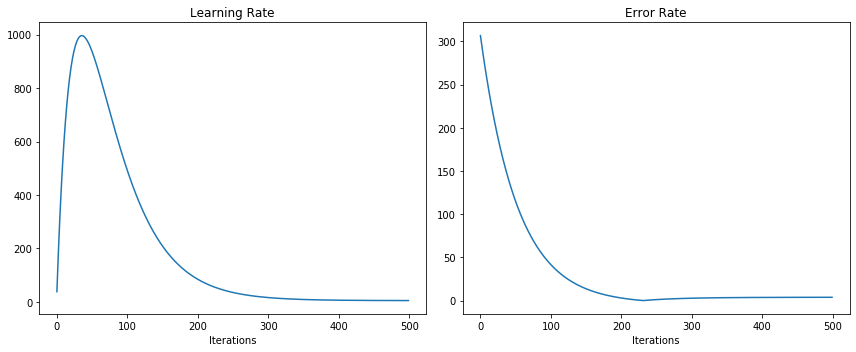

In [23]:
step_size = 10**-8
iterations = 500

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly.

- We set the step size and the iterations, then we fit our model and plot the results of the learning rate and the error of the model. We chose 100 iterations, because that's how many iterations the model needs to get really close to the best fit, using a step size of 10e-7. 

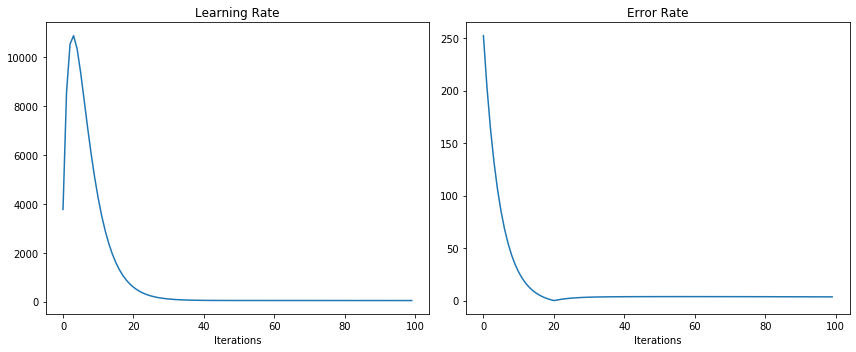

In [24]:
step_size = 10**-7
iterations = 100

coefficients,differences,errors = learn_linreg_gd(lf,lf_derivative,X,y,step_size,iterations)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. This step size did a lot better than the one before, as we can see that the big decrease on both graphs happened before that in the previous one; after that, it keeps decreasing slightly. In this case we required 100 iterations to find the optimal fit. 

------------

### Part B: (7 Points): Step Length for Gradient Descent

#### Backtracking

- We create the three functions that we will be using. The first one performs the step size backtracking to find the best one to fit our model; the second one calculates the gradient descent using the stepsize_backtracking() function; and the last one fits our model using the gradient descent function with the step length algorithm.

In [25]:
def stepsize_backtracking(function,function_derivative,x,y,beta,steepness,reduction_factor):
    step_size = 1
    gradient = np.sum(function_derivative(x,y,beta))
    while np.sum(function(x,y,beta-step_size*gradient)) < np.sum(function(x,y,beta))-steepness*step_size*(gradient)**2:
        step_size = reduction_factor*step_size
    return step_size

def minimize_gd_backtracking(function,function_derivative,x,y,beta,max_iterations,steepness,
                                         reduction_factor):
    old_beta = beta
    differences = []
    errors = []
    for i in range(max_iterations):
        step_size = stepsize_backtracking(function,function_derivative,x,y,beta,steepness,reduction_factor)
        gradient = function_derivative(x,y,old_beta)
        new_beta = old_beta-step_size*gradient
        difference = abs(np.sum(function(x,y,old_beta) - function(x,y,new_beta)))
        differences.append(difference)
        y_predicted = predict_linreg(x,new_beta)
        error = calculate_rmse(y,y_predicted)
        errors.append(error)
        old_beta=new_beta
    return new_beta,differences,errors

def learn_linreg_gd_backtracking(function,function_derivative,x_data,y_data,max_iterations,steepness,reduction_factor):
    X = x_data
    y = y_data
    b0 = np.full((X.shape[1],1),0)
    coefficients,differences,errors = minimize_gd_backtracking(function,function_derivative,
                                                               x_data,y_data,b0,max_iterations,steepness,reduction_factor)
    return (coefficients,differences,errors)

#### 1. Airfare & Demand

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our backtracking algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 1000 iterations, because that's how many iterations the model needs to get really close to the best fit. 

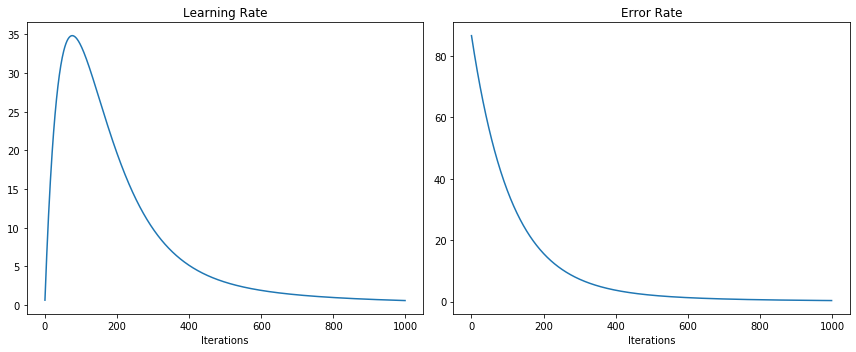

In [26]:
X = normalize_dataframe(x_train_airfare)
y_reshape = np.array(y_train_airfare).reshape(len(y_train_airfare),1)
y = normalize_dataframe(y_reshape)

iterations = 1000
steepness = 0.1
factor = 0.5

coefficients,differences,errors = learn_linreg_gd_backtracking(lf,lf_derivative,X,y,iterations,steepness,factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero.

#### 2. Wine Quality

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our backtracking algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 500 iterations, because that's how many iterations the model needs to get really close to the best fit.

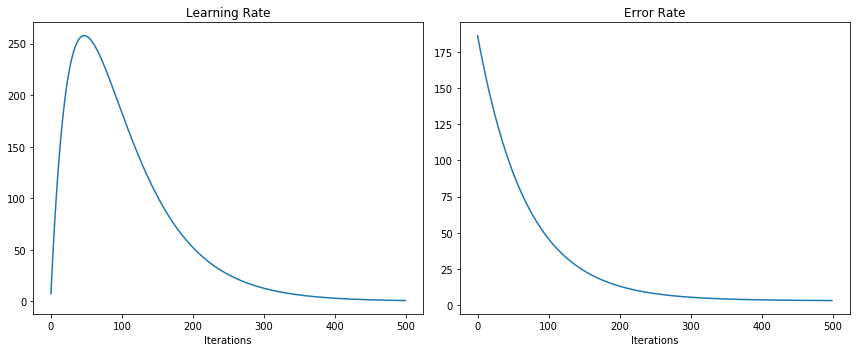

In [27]:
X = normalize_dataframe(x_train_wine)
y_reshape = np.array(y_train_wine).reshape(len(y_train_wine),1)
y = normalize_dataframe(y_reshape)

iterations = 500
steepness = 0.1
factor = 0.5

coefficients,differences,errors = learn_linreg_gd_backtracking(lf,lf_derivative,X,y,iterations,steepness,factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

#### 3. Parkinson's Dataset

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our backtracking algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 500 iterations, because that's how many iterations the model needs to get really close to the best fit.

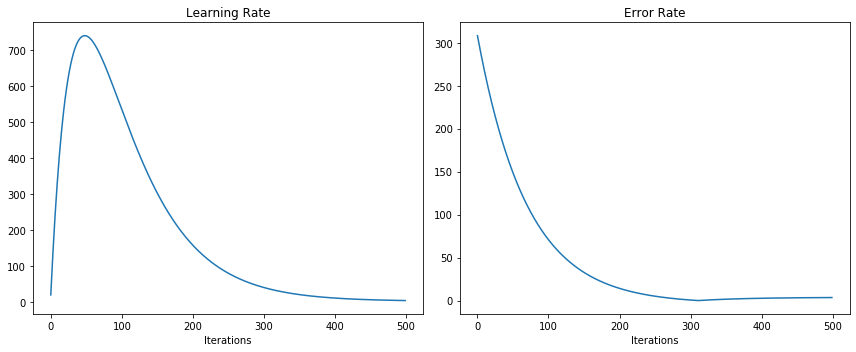

In [28]:
X = normalize_dataframe(x_train_parksinson)
y_reshape = np.array(y_train_parksinson).reshape(len(y_train_parksinson),1)
y = normalize_dataframe(y_reshape)

iterations = 500
steepness = 0.1
factor = 0.5

coefficients,differences,errors = learn_linreg_gd_backtracking(lf,lf_derivative,X,y,iterations,steepness,factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

-----------

#### Bold Driver

- We create the three functions that we will be using. The first one performs the step size bold driver to find the best one to fit our model; the second one calculates the gradient descent using the stepsize_bolddriver() function; and the last one fits our model using the gradient descent function with the step length algorithm. 

In [29]:
def stepsize_bolddriver(function,function_derivative,x,y,beta,step_size,increase_factor,decrease_factor):
    new_step_size = step_size*increase_factor
    gradient = np.sum(function_derivative(x,y,beta))
    while np.sum(function(x,y,beta) - abs(function(x,y,beta+new_step_size*gradient))) <= 0:
        new_step_size = new_step_size*decrease_factor
    return new_step_size

def minimize_gd_bolddriver(function,function_derivative,x,y,beta,step_size,max_iterations,increase_factor,
                                       decrease_factor):
    old_beta = beta
    differences = []
    errors = []
    for i in range(max_iterations):
        step_size = stepsize_bolddriver(function,function_derivative,x,y,beta,step_size,increase_factor,decrease_factor)
        gradient = function_derivative(x,y,old_beta)
        new_beta = old_beta-step_size*gradient
        difference = abs(np.sum(function(x,y,old_beta) - function(x,y,new_beta)))
        differences.append(difference)
        y_predicted = predict_linreg(x,new_beta)
        error = calculate_rmse(y,y_predicted)
        errors.append(error)
        old_beta=new_beta
    return new_beta,differences,errors

def learn_linreg_gd_bolddriver(function,function_derivative,x_data,y_data,step_size,max_iterations,
                               increase_factor,decrease_factor):
    X = x_data
    y = y_data
    b0 = np.full((X.shape[1],1),0)
    coefficients,differences,errors = minimize_gd_bolddriver(function,function_derivative,x_data,y_data,
                                                             b0,step_size,max_iterations,increase_factor,decrease_factor)
    return (coefficients,differences,errors)

#### 1. Airfare & Demand

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our bold driver algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 300 iterations, because that's how many iterations the model needs to get really close to the best fit. 

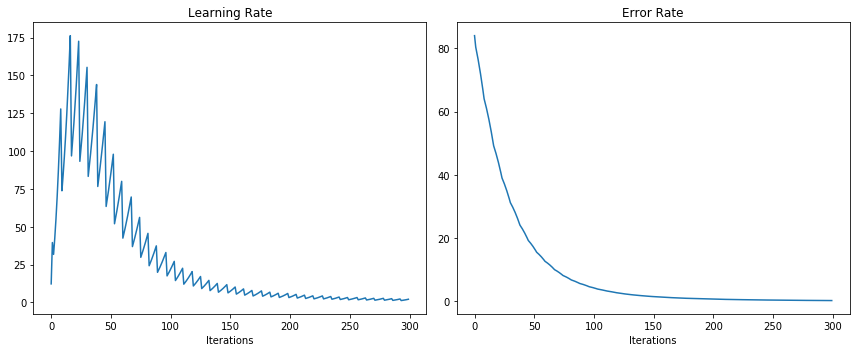

In [30]:
X = normalize_dataframe(x_train_airfare)
y_reshape = np.array(y_train_airfare).reshape(len(y_train_airfare),1)
y = normalize_dataframe(y_reshape)

step_size = 1
iterations = 300
increase_factor = 1.1
decrease_factor = 0.5

coefficients,differences,errors = learn_linreg_gd_bolddriver(lf,lf_derivative,X,y,step_size,
                                                             iterations,increase_factor,decrease_factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero.

#### 2. Wine Quality

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our bold driver algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 200 iterations, because that's how many iterations the model needs to get really close to the best fit. 

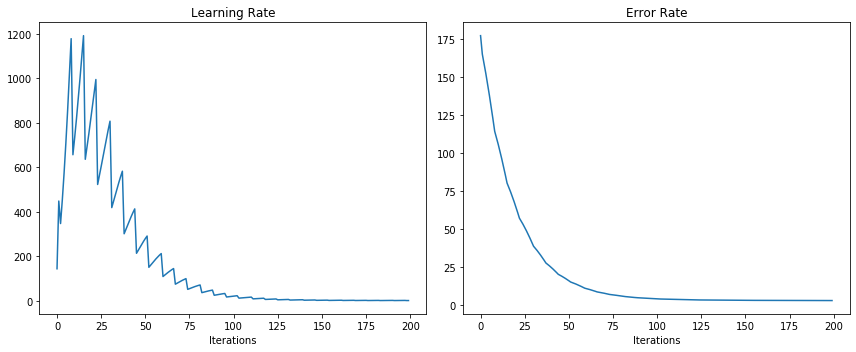

In [31]:
X = normalize_dataframe(x_train_wine)
y_reshape = np.array(y_train_wine).reshape(len(y_train_wine),1)
y = normalize_dataframe(y_reshape)

step_size = 1
iterations = 200
increase_factor = 1.1
decrease_factor = 0.5

coefficients,differences,errors = learn_linreg_gd_bolddriver(lf,lf_derivative,X,y,step_size,
                                                             iterations,increase_factor,decrease_factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

#### 3. Parkinson's Dataset

- We define our 'x' and 'y' data set by normalizing both of them. Afterwards, we define some parameters for our bold driver algorithm, then we fit our model and plot the results of the learning rate and the error of the model. We chose 300 iterations, because that's how many iterations the model needs to get really close to the best fit.  

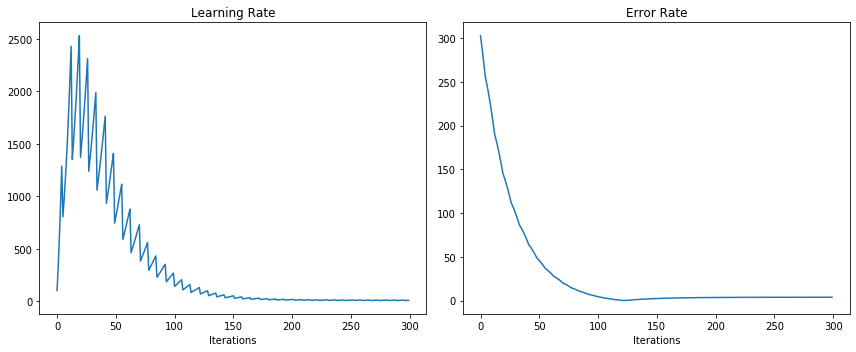

In [32]:
X = normalize_dataframe(x_train_parksinson)
y_reshape = np.array(y_train_parksinson).reshape(len(y_train_parksinson),1)
y = normalize_dataframe(y_reshape)

step_size = 1
iterations = 300
increase_factor = 1.1
decrease_factor = 0.5

coefficients,differences,errors = learn_linreg_gd_bolddriver(lf,lf_derivative,X,y,step_size,
                                                             iterations,increase_factor,decrease_factor)

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.plot(differences)
plt.title('Learning Rate')
plt.xlabel('Iterations')

plt.subplot(1,2,2)
plt.plot(errors)
plt.title('Error Rate')
plt.xlabel('Iterations')

plt.tight_layout()

**Comment:** The graph on the left shows how the coefficients adjust on every iteration. At the beginning it goes up, but then after a certain point it starts decreasing, which means that the coefficients are decreasing to find the minimum. The graph on the right shows how the RMSE decreases with each iteration, to the point where it gets close to zero. 

#### Compare the different step length algorithms (Wine Quality Graphs Used for the Comparison)

**Fixed Step Length:** With the fixed step-length, we got the best results. We got the best fit at less than 100 iterations with a step size of 10e-6; although it was not easy to find the best fitting step size, as a trial and error approach was necessary to find it. 
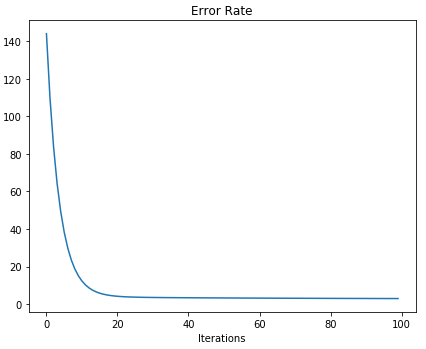

**Backtracking Algorithm:** We can see that the backtracking algorithm did pretty well; it got the best fit at around 500 iterations. It is true that it may have done worse than the fixed step length, but we weren't required to look for the best step size manually through trial and error.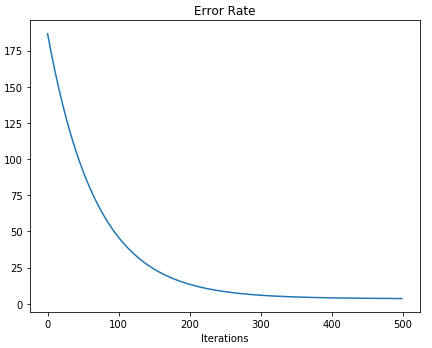

**Bold Driver Algorithm:** We can see that the bold driver algorithm did really well; it got the best fit at around 200 iterations. We can see that this algorithm did better than the backtracking, as it required less iterations to get the best fit and a trial and error search was not necessary for the step size.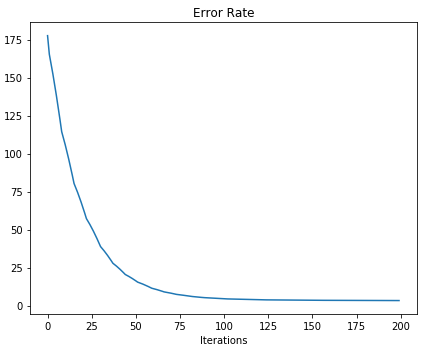